In [57]:
import pyroomacoustics as pra
import matplotlib.pyplot as plt
from IPython.display import display, Audio
import numpy as np

In [58]:
# LiDAR(LDS-01)のスペック
distance_range = (120, 3500) # mm
distance_accuracy = 10 # mm
angular_range = 360 # degree
angular_resolution = 1 # degree

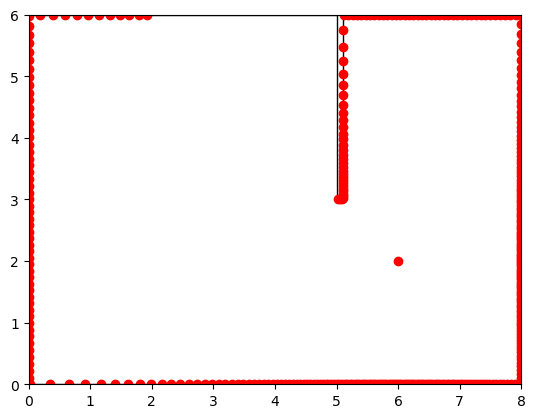

[[8.000000336242291, 2.0174537385158593], [6.753935334750804e-07, 1.9476387991495174], [8.000000342061975, 2.052371852095582], [6.928525852120231e-07, 1.842884488727862], [8.000000347886983, 2.087321901006098], [7.103276044062499e-07, 1.7380343735625008], [8.000000353720877, 2.122325261935464], [7.278292793978267e-07, 1.6330243236130397], [8.00000035956724, 2.157403441947792], [7.453683637143247e-07, 1.5277898177140519], [8.000000365429688, 2.192578131581954], [7.62955702620159e-07, 1.4222657842790465], [8.000000371311877, 2.2278712589089356], [7.806022601452466e-07, 1.3163864391285207], [8.000000377217507, 2.2633050448364185], [7.983191467372775e-07, 1.2100851195763345], [8.000000383150343, 2.298902059960458], [8.161176476875278e-07, 1.103294113874833], [8.000000389114213, 2.3346852832782266], [8.340092524872056e-07, 0.9959444850767669], [8.000000395113027, 2.37067816309294], [8.520056852798811e-07, 0.8879658883207135], [8.00000040115078, 2.4069046804624477], [8.701189365857496e-07, 0

In [59]:
center = [6,2] # lidarの位置
# 部屋の寸法
corners = np.array([[0,0], [0,6], [5,6], [5,3], [5.1,3], [5.1,6], [8,6], [8,0]])  # [x,y]
aroom = pra.Room.from_corners(corners.T)
fig, ax = aroom.plot()
# lidarの位置をプロット
ax.plot(center[0], center[1], 'ro')
# lidarの点群をプロット
point_list = []
for angle in range(0, 180, angular_resolution):
    theta = np.deg2rad(angle + angular_resolution/2)
    points = [[1e5, 1e5], [-1e5, -1e5]]
    for i in range(len(corners)):
        epsilon = 1e-6
        a, b = center
        p, q = corners[i%len(corners)]
        r, s = corners[(i+1)%len(corners)]
        x = (b - s - a*np.tan(theta) + r*(q - s)/(p - r + epsilon))/((q - s)/(p - r + epsilon) - np.tan(theta))
        y = np.tan(theta)*x + b - a*np.tan(theta)
        if (x - p)*(x - r) <= epsilon and (y - q)*(y - s) <= epsilon: # 線分上にあるか
            # x > center[0]の点からxが最も小さい点を選ぶ
            if x >= center[0]:
                if points[0][0] > x:
                    points[0] = [x, y]
            # x < center[0]の点からxが最も大きい点を選ぶ
            else:
                if points[1][0] < x:
                    points[1] = [x, y]
    ax.plot(points[0][0], points[0][1], 'ro')
    ax.plot(points[1][0], points[1][1], 'ro')
    point_list.append(points[0])
    point_list.append(points[1])
plt.show()
print(point_list)

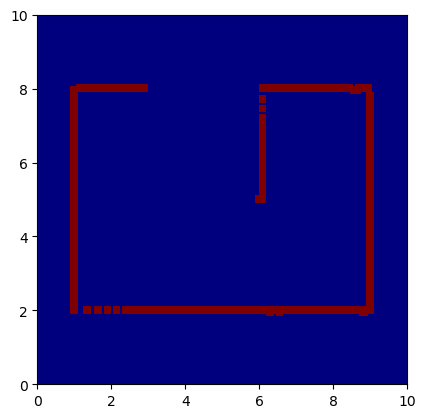

In [60]:
max_field = 10
# Define the grid spacing
spacing = 0.05
# Calculate the number of points in each dimension
num_points = int(max_field / spacing)
# Create the grid
grid = np.zeros((num_points, num_points))
# 部屋の大まかな寸法
room_dim = np.array([8, 6])
point_list_np = np.array(point_list) + max_field/2 - room_dim/2 # m
# ポイントをグリッドに描画
size = 2
for point in point_list_np:
    x, y = point
    x = int(x / spacing)
    y = int(y / spacing)
    grid[x-size:x+size, y-size:y+size] = 1
# gridをプロット
plt.imshow(grid.T, cmap='jet', interpolation='nearest', extent=[0, 10, 0, 10], origin='lower')

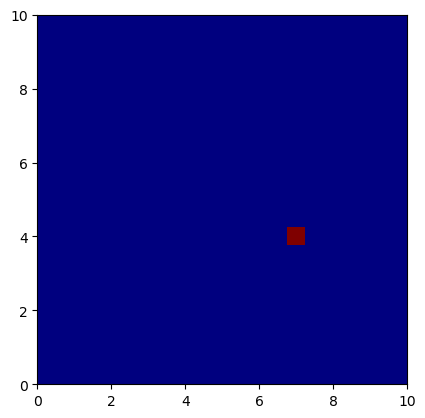

In [64]:
# ロボットの位置を描画
grid2 = np.zeros((num_points, num_points))
center_ = np.array(center) + max_field/2 - room_dim/2 # m
size = 5
x, y = center_
x = int(x / spacing)
y = int(y / spacing)
grid2[x-size:x+size, y-size:y+size] = 1
# gridをプロット
plt.imshow(grid2.T, cmap='jet', interpolation='nearest', extent=[0, 10, 0, 10], origin='lower')